## Colab


In [182]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [183]:
%%bash
wget "https://pjreddie.com/media/files/yolov3.weights"

--2024-06-22 07:15:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.2’

     0K .......... .......... .......... .......... ..........  0%  295K 13m40s
    50K .......... .......... .......... .......... ..........  0% 1.73M 7m58s
   100K .......... .......... .......... .......... ..........  0%  368K 8m58s
   150K .......... .......... .......... .......... ..........  0% 1.75M 7m17s
   200K .......... .......... .......... .......... ..........  0%  316K 8m23s
   250K .......... .......... .......... .......... ..........  0% 70.9M 7m0s
   300K .......... .......... .......... .......... ..........  0%  151M 6m0s
   350K .......... .......... .......... .......... ..........  0% 77.7M 5m15s
   400K .......... .......... ........

In [184]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2024-06-22 07:15:34--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.2’

     0K ........                                              100% 47.5M=0s

2024-06-22 07:15:34 (47.5 MB/s) - ‘yolov3.cfg.2’ saved [8342/8342]



In [185]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.4

## Loading all the labels
labels = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

## Generating colors for each object for later plotting
colors= np.random.randint(0,255,size=(len(labels),3), dtype='uint8')

In [186]:
colors.shape

(80, 3)

In [187]:
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")
type(net)

cv2.dnn.Net

In [188]:
image = cv2.imread("jungle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name = os.path.basename("jungle.jpg")
file_name, ext = file_name.split(".")
file_name, ext

('jungle', 'jpg')

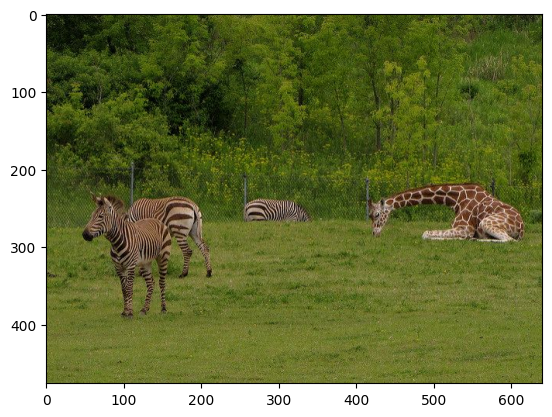

In [189]:
plt.imshow(image)

In [190]:
image.shape

(476, 640, 3)

In [191]:
h, w = image.shape[:2]
## Create 4 D blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
blob.shape

(1, 3, 416, 416)

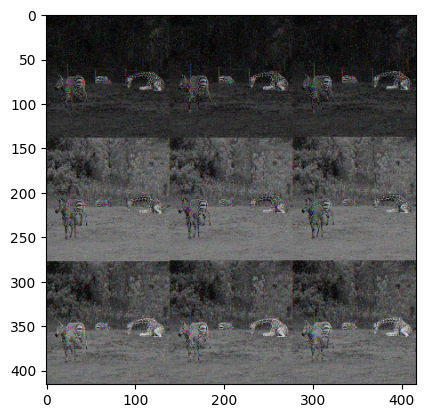

In [192]:
plt.imshow(blob[0].reshape(416,416,3))

In [193]:
ln = net.getLayerNames()
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [194]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [195]:
## Set the blob as the input of network
net.setInput(blob)

## get all the layer names
ln = net.getLayerNames()
try :
    ln = [ln[i[0]-1] for i in net.getUnconnectedOutLayers()]
except IndexError:
    ## In case getUnconnectedOutLayers() returns a 1D array when cuda isnot available
    ln = [ln[i-1] for i in net.getUnconnectedOutLayers()]

## Run the network
layer_outputs = net.forward(ln)
layer_outputs

(array([[0.03155247, 0.04028403, 0.28403947, ..., 0.        , 0.        ,
         0.        ],
        [0.04219297, 0.0294946 , 0.23797372, ..., 0.        , 0.        ,
         0.        ],
        [0.03956942, 0.03125083, 0.8829473 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9573964 , 0.95129865, 0.49436393, ..., 0.        , 0.        ,
         0.        ],
        [0.9560443 , 0.9671822 , 0.32762206, ..., 0.        , 0.        ,
         0.        ],
        [0.9637412 , 0.9515038 , 0.78527254, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02102786, 0.01836234, 0.05919967, ..., 0.        , 0.        ,
         0.        ],
        [0.01356249, 0.01778921, 0.297508  , ..., 0.        , 0.        ,
         0.        ],
        [0.02029595, 0.01704775, 0.08835562, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96978503, 0.9751966 , 0.04962498, ..., 0.        , 0.        ,
         0.        

In [196]:
boxes, confidences, class_ids = [], [], []

### loop over each of the output layer
for output in layer_outputs:

  ## loop over each of the object detection
  for detection in output:

    ## Extract the class_id (label) and confidence (probability) of the current object detection
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]

    ## Discard out weak predictions by ensuring the detected probability is greater than threshold
    if confidence > CONFIDENCE:

      ## Scale the bounding box coordinate back to relative to the size of image, keeping in mind that yolo actually returns center (x,y) coordinates of the bounding box followed by the boxes' width and height
      box = detection[0:4] * np.array([w, h, w, h])
      (centerX, centerY, width, height) = box.astype("int")

      ## use the center (x,y) to derive the top-left corner of bounding box
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      ## update the list of bounding box coordinates and confidences and class_ids
      boxes.append([x, y, int(width), int(height)])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [165]:
boxes

[[405, 223, 217, 59],
 [55, 231, 159, 114],
 [87, 236, 136, 104],
 [414, 224, 208, 66],
 [47, 237, 147, 137],
 [76, 235, 154, 121],
 [247, 237, 93, 31],
 [250, 236, 95, 34],
 [249, 240, 97, 34],
 [103, 233, 109, 110],
 [46, 231, 123, 153],
 [102, 237, 108, 119],
 [42, 241, 107, 149],
 [48, 243, 115, 145],
 [255, 237, 85, 32]]

In [166]:
confidences

[0.6346844434738159,
 0.9911091923713684,
 0.8938906192779541,
 0.6215727925300598,
 0.9985881447792053,
 0.5608307123184204,
 0.7890708446502686,
 0.995597779750824,
 0.8802229762077332,
 0.8385530114173889,
 0.9966028928756714,
 0.5241893529891968,
 0.680671751499176,
 0.9988306760787964,
 0.700495183467865]

In [167]:
class_ids

[23, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]

In [168]:
thickness = 2

for i  in range(len(boxes)):
    x, y, w, h = boxes[i]
    color = [int(c) for c in colors[class_ids[i]]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)

    text = f"{(labels[class_ids[i]])}: { confidences[i]:.2f}"
    (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1.4, thickness = thickness)[0]
    text_offset_x = x
    text_offset_y = y - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = image.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color, cv2.FILLED)

    image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)

    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 0), thickness)

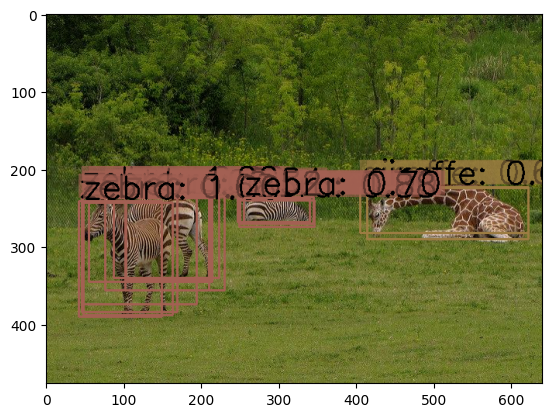

In [169]:
plt.imshow(image)

## Use Non maximum suppression

In [197]:
## Apply non max suppression to supress weak and overlapping bounding boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)
indexes

array([13,  7,  2,  0], dtype=int32)

In [202]:
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(labels[class_ids[i]])
        color =  colors[class_ids[i]]
        cv2.rectangle(image, (x, y), (x + w, y + h), (int(color[0]),int(color[1]),int(color[2])), thickness)
        cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 0), thickness)

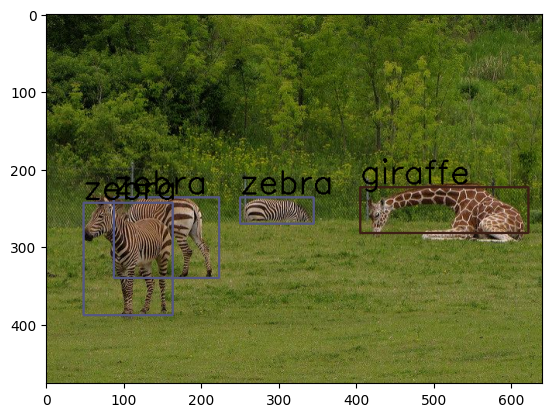

In [203]:
plt.imshow(image)